# 1. Для изображения sar_3.jpg найти наиболее протяженный участок

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math 
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

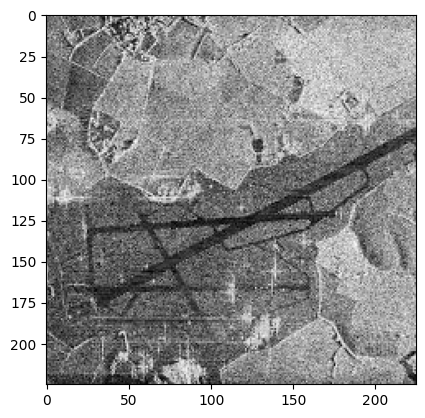

In [15]:
plt.imshow(image)

In [16]:
bin_img = copy.deepcopy(image_gray)
threshold_value = 80
bin_img[image_gray < threshold_value] = 0
bin_img[image_gray >= threshold_value] = 255

canny = cv2.Canny(bin_img, 0,250, apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

# (выделить линии при помощи преобразования Хафа)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

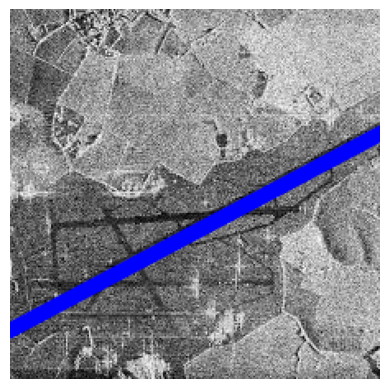

In [17]:
if lines is not None:
    for i in range(0, len(lines)):
        longest = None
        max = 0
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max:
            max = length
            longest = (pt1, pt2)
    if longest: # БЕРЁМ ТОЛЬКО ОДНУ МАКС ЛИНИЮ!
        cv2.line(image, longest[0], longest[1], (0, 0, 255), 7, cv2.LINE_AA)
        
plt.imshow(image); plt.axis('off')

# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

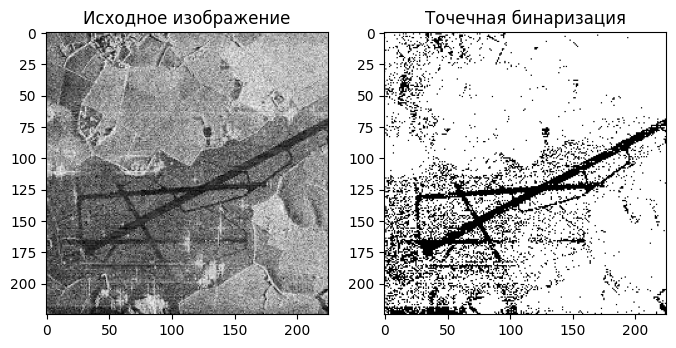

In [18]:
bin_img = copy.deepcopy(image_gray)
T = 80
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Исходное изображение')
plt.subplot(1, 2, 2); plt.imshow(bin_img, cmap='gray'); plt.title('Точечная бинаризация')
plt.show()

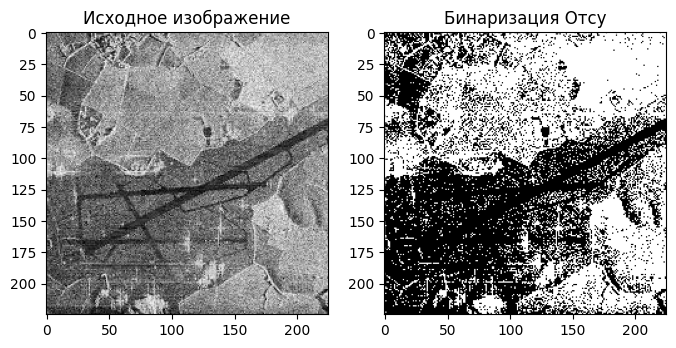

In [19]:
_, otsu = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Исходное изображение')
plt.subplot(1, 2, 2); plt.imshow(otsu, cmap='gray'); plt.title('Бинаризация Отсу')
plt.show()

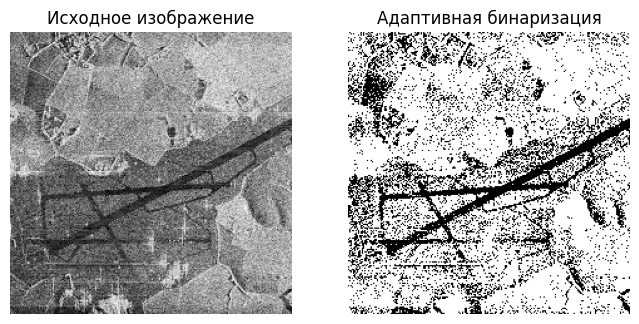

In [20]:
adapt = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,191,25)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Исходное изображение'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(adapt, cmap='gray'); plt.title('Адаптивная бинаризация'); plt.axis('off')
plt.show()

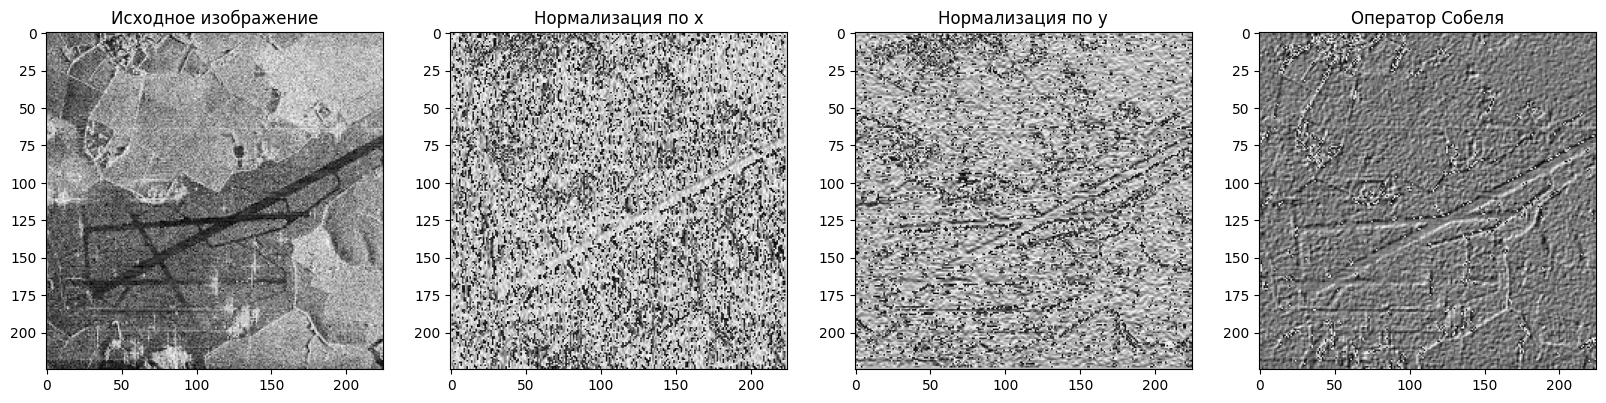

In [21]:
scale = 0.5
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Исходное изображение')
plt.subplot(1, 4, 2); plt.imshow((grad_x - grad_x.min())*255, cmap="gray"); plt.title('Нормализация по х')
plt.subplot(1, 4, 3); plt.imshow((grad_y - grad_y.min())*255, cmap="gray"); plt.title('Нормализация по у')
plt.subplot(1, 4, 4); plt.imshow((grad - grad.min())*255, cmap="gray"); plt.title('Оператор Собеля')
plt.show()

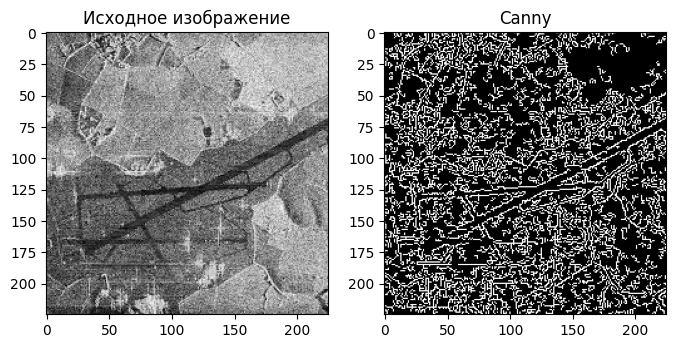

In [22]:
Canny = cv2.Canny(image_gray,150,300)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Исходное изображение')
plt.subplot(1, 2, 2); plt.imshow(Canny, cmap='gray'); plt.title('Canny')
plt.show()